In [220]:
#import dependencies
import numpy as np
import pandas as pd
import time
import json
import matplotlib
import matplotlib.pyplot as plt
import csv
import csv
import seaborn as sns
%matplotlib inline

In [81]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.options.display.float_format = '{:,.2f}'.format
#pd.set_option('display.precision',3)

Load data from csv file and present top rows

In [82]:
df = pd.read_csv('../../clean_data.csv') 
df.head()

/Users/Oren/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,control_area,unit,scp,station,linename,division,date,time,desc,cum_entries,cum_exits,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date
0,0,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,00:00:00,REGULAR,5704958,1934814,2016-06-18 00:00:00,nan,nan,NaN,nan,nan,2016-06-18
1,1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,5704958,1934829,2016-06-18 04:00:00,"5,704,958.00","1,934,814.00",2016-06-18 00:00:00,0.00,15.00,2016-06-18
2,2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,5704958,1934886,2016-06-18 08:00:00,"5,704,958.00","1,934,829.00",2016-06-18 04:00:00,0.00,57.00,2016-06-18
3,3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,5704958,1934993,2016-06-18 12:00:00,"5,704,958.00","1,934,886.00",2016-06-18 08:00:00,0.00,107.00,2016-06-18
4,4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,5704958,1935069,2016-06-18 16:00:00,"5,704,958.00","1,934,993.00",2016-06-18 12:00:00,0.00,76.00,2016-06-18


We want to look at exits, since for our business case, we assume that most customers will be buying from the food truck after leaving the station. Therefore, we can select the following columns from the entire dataset: Station, Date, and number of exits

In [83]:
newdf = df.filter(['station','date','exits'], axis=1)
newdf

,station,date,exits
0,59 ST,06/18/2016,nan
1,59 ST,06/18/2016,15.00
2,59 ST,06/18/2016,57.00
3,59 ST,06/18/2016,107.00
4,59 ST,06/18/2016,76.00
5,59 ST,06/18/2016,63.00
6,59 ST,06/19/2016,36.00
7,59 ST,06/19/2016,4.00
8,59 ST,06/19/2016,35.00
9,59 ST,06/19/2016,95.00


In [84]:
newdf = newdf.reset_index(drop=True)
newdf.columns = newdf.columns.str.strip()
newdf.station.unique()
newdf.drop_duplicates().station.value_counts()

34 ST-PENN STA     114432
23 ST               88011
34 ST-HERALD SQ     87280
FULTON ST           83142
GRD CNTRL-42 ST     82804
TIMES SQ-42 ST      80641
86 ST               74453
42 ST-PORT AUTH     72307
59 ST               70050
CANAL ST            69531
125 ST              69224
14 ST-UNION SQ      67758
                    ...  
238 ST               3668
PENNSYLVANIA AV      3401
BROAD CHANNEL        3255
PATH WTC 2           3180
RIT-ROOSEVELT        2938
RIT-MANHATTAN        2703
SUTTER AV-RUTLD      2056
JUNIUS ST            1838
PATH WTC              533
ST. GEORGE            429
ORCHARD BEACH         386
TOMPKINSVILLE         379
Name: station, Length: 380, dtype: int64

In [85]:
newdf.date.describe()

count       10269875
unique           371
top       04/12/2017
freq           31340
Name: date, dtype: object

Convert date column from object to datetype so that it's easier to manipulate and graph

In [87]:
newdf['date'] = pd.to_datetime(newdf['date'], format="%m/%d/%Y")
newdf.dtypes

station            object
date       datetime64[ns]
exits             float64
dtype: object

In [88]:
newdf.head(50)

,station,date,exits
0,59 ST,2016-06-18,nan
1,59 ST,2016-06-18,15.00
2,59 ST,2016-06-18,57.00
3,59 ST,2016-06-18,107.00
4,59 ST,2016-06-18,76.00
5,59 ST,2016-06-18,63.00
6,59 ST,2016-06-19,36.00
7,59 ST,2016-06-19,4.00
8,59 ST,2016-06-19,35.00
9,59 ST,2016-06-19,95.00


We have some NaN values, which we will fill in as 0.  
The data type of exits can also be changed from float to int

In [102]:
newdf['exits']=newdf['exits'].fillna(0).astype(int)
newdf

,station,date,exits
0,59 ST,2016-06-18,0
1,59 ST,2016-06-18,15
2,59 ST,2016-06-18,57
3,59 ST,2016-06-18,107
4,59 ST,2016-06-18,76
5,59 ST,2016-06-18,63
6,59 ST,2016-06-19,36
7,59 ST,2016-06-19,4
8,59 ST,2016-06-19,35
9,59 ST,2016-06-19,95


Now we can find the top 10 busiest stations

In [99]:
top = newdf.groupby(['station', 'date']).aggregate('sum').reset_index()
top = newdf.groupby(['station']).agg('sum').sort_values(['exits'], ascending=False)

top.head(10)
#newdf.groupby(['station']).agg('sum')
#newdf.sort_values(['exits'], ascending=False)

,exits
station,
34 ST-PENN STA,45541257
GRD CNTRL-42 ST,41419403
34 ST-HERALD SQ,35591036
14 ST-UNION SQ,29989664
TIMES SQ-42 ST,29590757
23 ST,27053764
86 ST,26037725
FULTON ST,23443254
42 ST-PORT AUTH,23372138


Sanity check

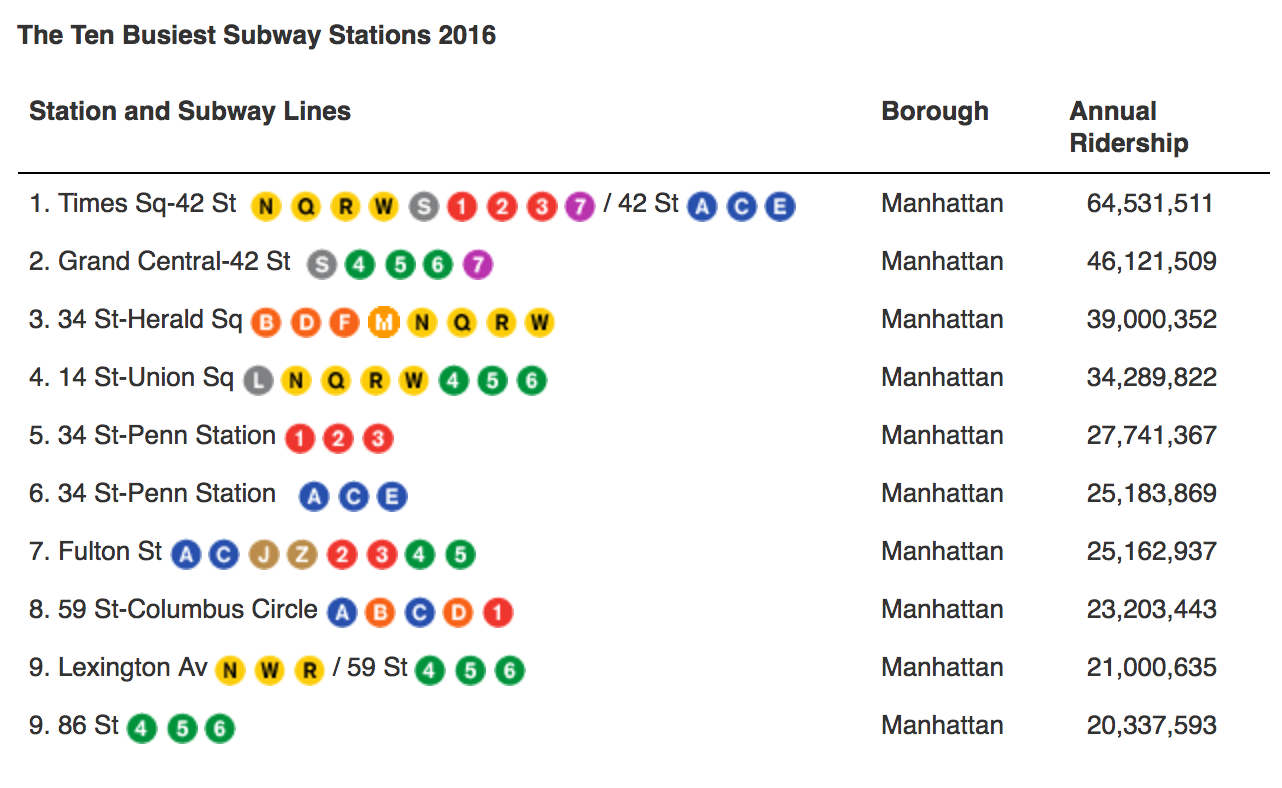



In [137]:
years = newdf.groupby(['station', 'date']).agg('sum')
years.sample(100)

,,exits
station,date,
33 ST-RAWSON ST,2017-02-17,8210
WOODHAVEN BLVD,2016-08-05,14866
INTERVALE AV,2016-12-30,2668
NORWOOD AV,2016-09-20,3910
CRESCENT ST,2016-07-05,4547
BEDFORD AV,2016-10-26,31437
JACKSON AV,2016-11-10,1125
METS-WILLETS PT,2016-07-24,4499
LACKAWANNA,2017-01-17,9769


By aggregating all station ridership to dates, we can see which dates saw most ridership, and convert the dates into days, to see which days of the week the food truck should post up

In [211]:
yr = newdf.groupby(['station', 'date']).aggregate('sum').reset_index()
yr = newdf.groupby(['date']).agg('sum').sort_values(['exits'], ascending=False)
yr['day'] = yr.index.weekday_name
yr

,exits,quarter,day
date,,,
2017-03-17,4768066,27655,Friday
2017-05-17,4735793,55908,Wednesday
2017-05-24,4735245,55842,Wednesday
2017-05-04,4734986,56856,Thursday
2017-04-05,4732541,56526,Wednesday
2017-03-16,4719972,27881,Thursday
2017-05-18,4716963,55600,Thursday
2016-10-06,4711614,108368,Thursday
2017-05-03,4706566,55856,Wednesday


If the business is not operating on a daily basis, they should concentrate towards the end of the week (Wednesday and Thursday)

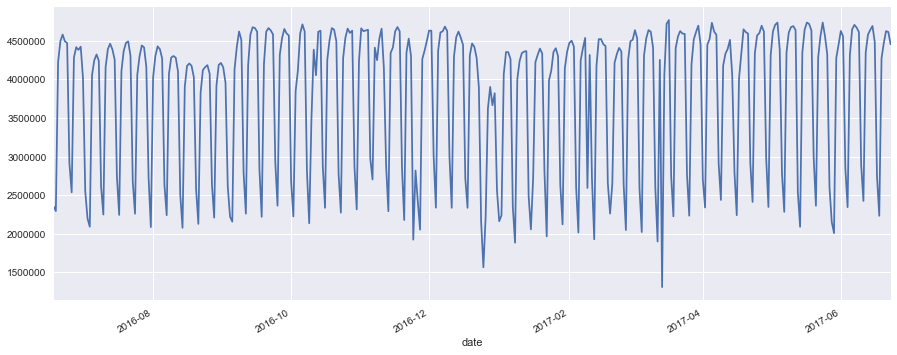

In [219]:
#yr.set_index(['date'],inplace=True)
yr['exits'].plot(figsize=(15, 6));

According to the total yearly ridership graph, July and August appear to be slower months.
If the company intends on starting operations in the near future, it is recommended to begin in September.
This is likely due to students (high school and college) returning to school, and in general people coming back from summer vacations.

In [193]:
newdf['quarter'] = newdf['date'].dt.quarter
newdf.describe()

,exits,quarter
count,"10,269,875.00","10,269,875.00"
mean,136.72,2.49
std,232.43,1.11
min,0.00,1.00
25%,8.00,2.00
50%,52.00,2.00
75%,165.00,3.00
max,"7,972.00",4.00


We can take a closer look at Penn Station

In [144]:
penn = newdf.loc[df.station =='34 ST-PENN STA']
penn = penn.filter(['station','date','exits'], axis=1)
penn = penn.groupby(['date']).aggregate('sum').reset_index()
penn

,date,exits
0,2016-06-18,68504
1,2016-06-19,64591
2,2016-06-20,139310
3,2016-06-21,148856
4,2016-06-22,149930
5,2016-06-23,151705
6,2016-06-24,152805
7,2016-06-25,83110
8,2016-06-26,80816
9,2016-06-27,143074


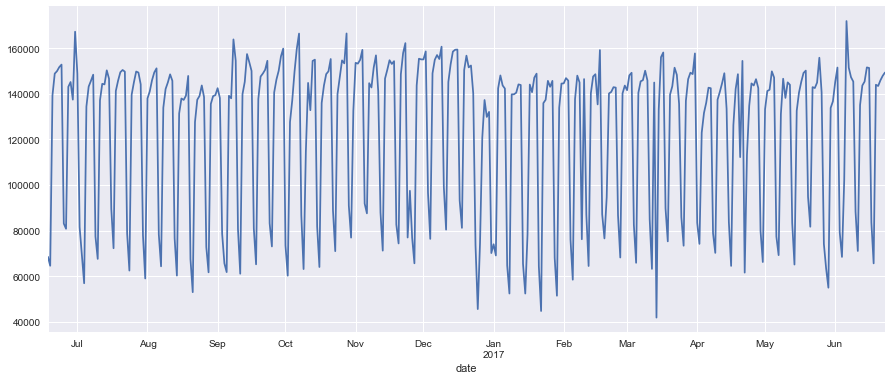

In [216]:
penn['exits'].plot(figsize=(15, 6));

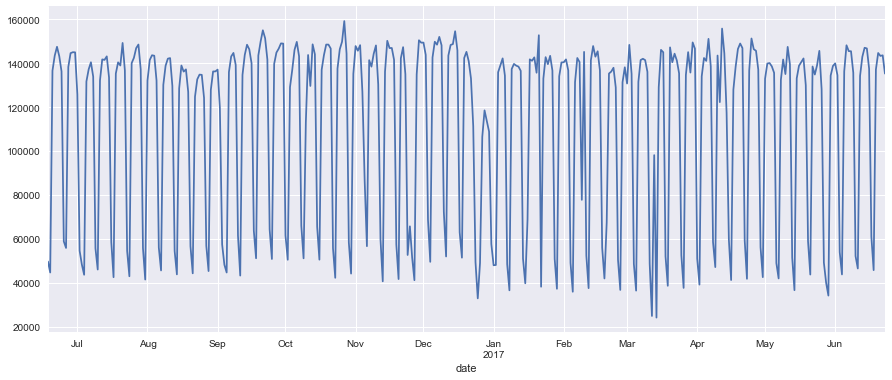

In [217]:
grand = newdf.loc[df.station =='GRD CNTRL-42 ST']
grand = grand.filter(['station','date','exits'], axis=1)
grand = grand.groupby(['date']).aggregate('sum').reset_index()
grand.set_index(['date'],inplace=True)
grand['exits'].plot(figsize=(15, 6));

In [206]:
septoct = newdf[(newdf['date'] > '2016-09-1') & (newdf['date'] <= '2016-10-31')]
septoct = septoct.groupby(['station', 'date']).aggregate('sum').reset_index()
septoct = septoct.groupby(['date']).agg('sum').sort_values(['exits'], ascending=False)
septoct = septoct.drop('quarter', 1)
septoct

,exits
date,
2016-10-06,4711614
2016-09-14,4674616
2016-09-15,4664521
2016-09-21,4663770
2016-10-19,4663761
2016-10-26,4656950
2016-09-28,4652346
2016-10-20,4643311
2016-09-22,4633820


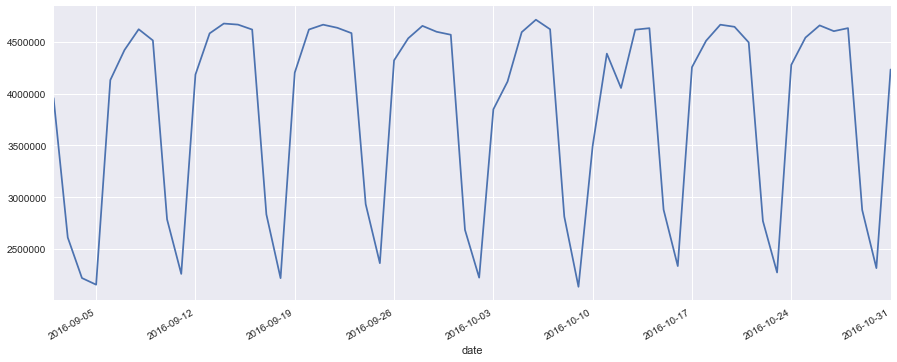

In [218]:
#septoct.set_index(['date'],inplace=True)
septoct['exits'].plot(figsize=(15, 6));

Seems like the Jewish high holidays impacted ridership  
Sanity check - 18.4% Jewish of NYC population